In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

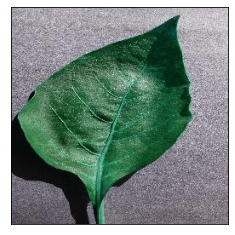

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/1e4bbf82-e2dd-48b2-b9fc-024c20bcdc7b___JR_HL 8172.JPG')
plt.imshow(img,cmap='gray'),plt.grid(False)
plt.xticks([]),plt.yticks([])

1-Histogram of an image

Image : it is the source image of type unit8 or float32.it should be given in square brackets,ie,"[img]". channels : it is also given in square brackets.It is the index of channel for which we calculate histogram

For example, if input is grayscale image,its value is [0].For color image,you can pass[0],[1]or[2]to calculate histogram of blue,green or red channel respectively.mask : mask image. To find histogranof full image,it is given as "None".But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.(I will show an example later.)histSize : this represents our BIN count.Need to be given in square brackets.For full scale,we pass[256].ranges : this is our RANGE.Normally,it is [0,256].

Text(0, 0.5, 'Frequency')

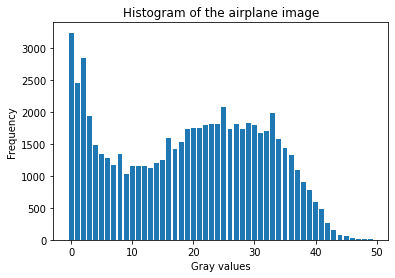

In [ ]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

#different methods for displaying a histogram
plt.bar(range(50),hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

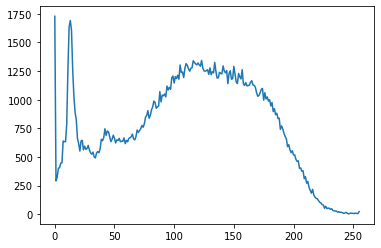

In [ ]:
#Another method 
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

Let's look at another example.

In [ ]:
#Let's read two other images
high = cv2.imread('/content/0da568cc-9b4d-4c12-b996-35b6f1f41c11___Rut._Bact.S 0951.JPG')
low = cv2.imread('/content/74fa2964-1307-4b24-8361-0145f7f7f371___RS_HL 5919.JPG')

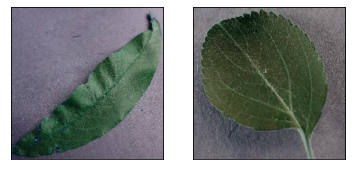

In [ ]:
plt.subplot(121),plt.imshow(high)
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(low)
plt.grid(False),plt.xticks([]),plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


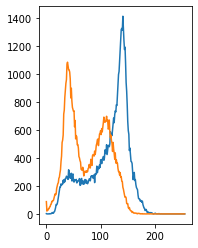

In [ ]:
#calculate histogra of both images for the last channel.
#channels can differ from 0 to 2.
hist_high = cv2.calcHist([high], [2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

#plot histograms
plt.subplot(122)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

2- Cumulative hostogram of an image
Calculate cumulative distribution function (CDF) of an image The cumulative histogram of an image is produced by calculating the cumulative sum of that image's histogram. There is no specific finction in OpenCV to obtain the CDF of an image; thus we use the cumsum function in Numpy.You can find more about the function here  

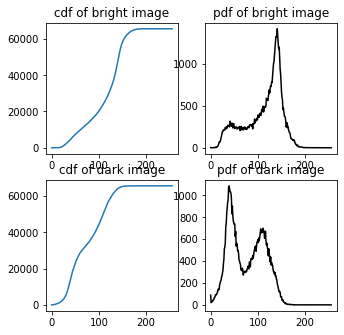

In [ ]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

#plot cumulative histograms
plt.subplot(221),plt.plot(cdf_high),plt.title('cdf of bright image')
plt.subplot(222),plt.plot(hist_high,'k'),plt.title('pdf of bright image')

plt.subplot(223),plt.plot(cdf_low),plt.title('cdf of dark image')
plt.subplot(224),plt.plot(hist_low,'k'),plt.title('pdf of dark image')

#adjust the placement of subplots
plt.subplots_adjust(bottom=2,right=0.8,top=3)

plt.show()

3-Histogram manipulation 
In order to continue image manipulation,first of all,we change the RGB images to to grayscale using cv2.cvtColor()

In [ ]:
low_gray = cv2.cvtColor(low,cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high,cv2.COLOR_BGR2GRAY)


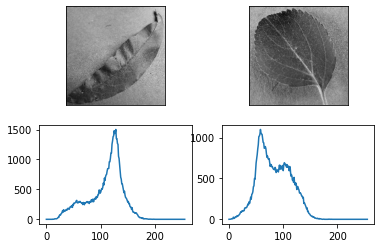

In [ ]:
#show images and their histograms

plt.subplot(221),plt.imshow(high_gray,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])
plt.subplot(223),plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222),plt.imshow(low_gray,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])
plt.subplot(224),plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()



3-1 Brightness


In order to change the brightness and contrast of an image, two parameters are often used as and for contrast and brightness,respectively.

In [ ]:
#Define a function to easily handle manipulation.
def manip_image(image,alpha,beta):

   new_image = np.zeros(image.shape,image.dtype)

   for y in range(image.shape[0]):
      for x in range(image.shape[1]):
        new_image[y,x]= np.clip(alpha*image[y,x]+beta,0,255)
  
   return new_image

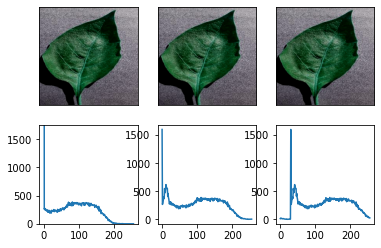

In [ ]:
#Test on the image 
bright = manip_image(img,1,30)
dark = manip_image(img,1,-30)

#compare the results
plt.figure()
plt.subplot(231),plt.imshow(dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(232),plt.imshow(dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(233),plt.imshow(dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])),plt.ylim((0,1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))


You can see the histogram forward and backward shifts.When we increase and decrease brightness, histogram moves to brighter and darker regions,respectively.

([<matplotlib.lines.Line2D at 0x7f0d385af350>], (0.0, 1100.0))

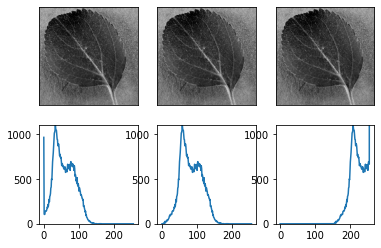

In [ ]:
#Test on the dark image 
l_bright = manip_image(low_gray,1,150)
l_dark = manip_image(low_gray,1,-25)

#Compare the results
plt.figure()
plt.subplot(231),plt.imshow(l_dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(232),plt.imshow(l_dark,cmap='gray')#
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(233),plt.imshow(l_dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])),plt.ylim((0,1100))

plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])),plt.ylim((0,1100))

plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])),plt.ylim((0,1100))



3-2 ContrastContrast of an image could be defined in different ways. One simple rule of thumb is to behave contrast as the distance between largest and smallest values in an image. In fact, the more the gray values are distributed a
over the 2k-1 range, the more the contrast will be 

(0.0, 1750.0)

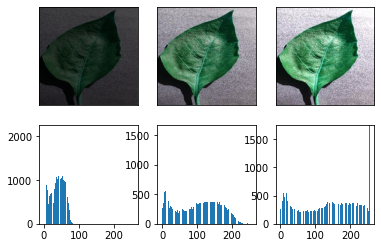

In [ ]:
#Test on the  image 
increase_contrast = manip_image(img,1.35,0)
decrease_contrast  = manip_image(img,0.35,0)

#Compare the results
plt.figure()
plt.subplot(231),plt.imshow(decrease_contrast,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(232),plt.imshow(img,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(233),plt.imshow(increase_contrast,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(234)
plt.bar(range(256),
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0,1750))


Histogram equalization 
One usual method to stretch the intensity values of an image in order to make its histogram similar to the perfect histogram shape is the historgam equalization.
cv2.equalizeHist(src[,dst])
src: the only required argument is the original image to be equalized

In [ ]:
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3,4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2,2])
plt.imshow(img,cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2,2])
plt.imshow(img,cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2,2])
plt.imshow(img,cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2,2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[:2,2])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())




error: ignored

CLAHE(Contrast Limited Adaptive Histogram Equalization)
As you can se above, some parts of the image are brighter then the other parts in the equalized image.in order to redue these artifacts in image enhancement ,an adaptive algorithm was developed

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))
img_cl = clahe.apply(img)

grid = plt.GridSpec(3,4,wspace=0.4,hspace=0.3)

plt.subplot(grid[:2,:2])
plt.imshow(img,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(grid[:2,:2])
plt.imshow(img,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(grid[:2,:2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[:2,:2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())



error: ignored